# About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.

In [14]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [163]:
df.info() # checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [5]:
df.drop('ID',inplace = True, axis = 1)

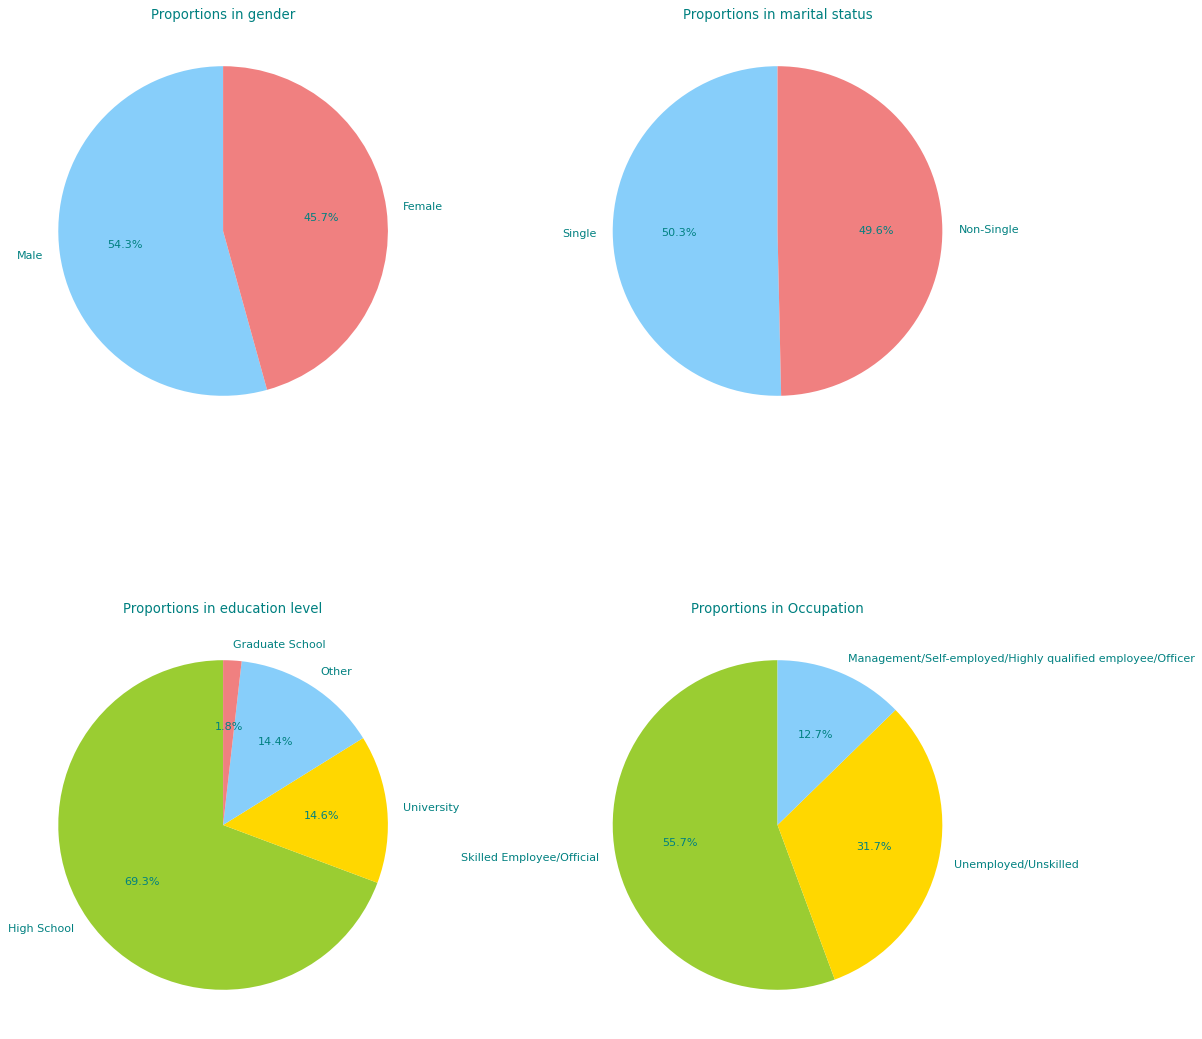

In [162]:
# Draw proportions chart

figure(figsize=(15, 15), dpi=80,facecolor = 'white')
palette_color = sns.color_palette('Set2')

df_sex = df[['Sex']].value_counts()
df_marriage = df[['Marital status']].value_counts()
df_education = df[['Education']].value_counts()
df_occupation = df[['Occupation']].value_counts()

# Count plot for gender
plt.subplot(2, 2, 1)
labels = 'Male', 'Female'
colors = ['lightskyblue', 'lightcoral']
plt.pie(df_sex,labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportions in gender')

# Count plot for marriage
plt.subplot(2, 2, 2)
labels = 'Single', 'Non-Single'
colors = ['lightskyblue', 'lightcoral']
plt.pie(df_marriage,labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportions in marital status')

# Count plot for education
plt.subplot(2, 2, 3)
labels = 'High School', 'University', 'Other', 'Graduate School'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(df_education,labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportions in education level')

# Count plot for occupation
plt.subplot(2, 2, 4)
plt.rcParams['text.color'] = 'teal'
labels = 'Skilled Employee/Official', 'Unemployed/Unskilled', 'Management/Self-employed/Highly qualified employee/Officer'
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(df_occupation,labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportions in Occupation')
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Age distribution')

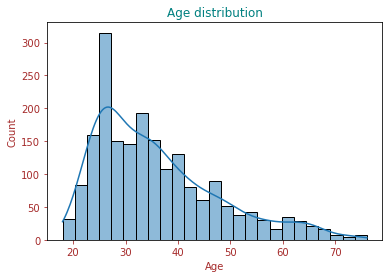

In [164]:
# Draw age distribution plot
sns.histplot(data=df, x="Age", kde=True)
plt.title('Age distribution')

# KMean plus

In [165]:
# Using k-Mean++
from sklearn.cluster import KMeans

km_plus = KMeans(n_clusters=3, 
            init='k-means++',  
            n_init=10,      
            max_iter=300,   
            random_state=0)

y_km_plus = km_plus.fit_predict(df)

In [166]:
# adding clusters column into data table
df_kmean = df.copy()
df_kmean['clusters'] = y_km_plus

# Finding optimal parameter k

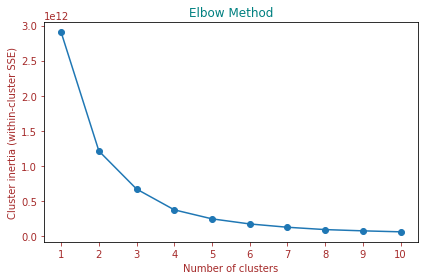

In [161]:
inertias = [] 

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

# Agglomerative clustering

In [108]:
from sklearn.cluster import AgglomerativeClustering
# Training agglomerative clustering
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
y_ac = ac.fit_predict(df)

In [109]:
# Adding clusters column into the table
df_ac = df.copy()
df_ac['clusters'] = y_ac

# Clusters proportion

In [110]:
# Agglomerative clustering
df_ac['clusters'].value_counts()

0    1337
2     603
1      60
Name: clusters, dtype: int64

In [111]:
# KMean++
df_kmean['clusters'].value_counts()

1    904
2    871
0    225
Name: clusters, dtype: int64

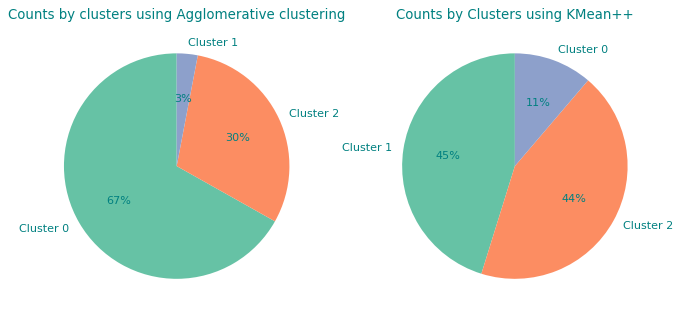

In [135]:
figure(figsize=(10, 10), dpi=80,facecolor = 'white')
palette_color = sns.color_palette('Set2')

plt.subplot(1, 2, 1)
labels = ['Cluster 0','Cluster 2', 'Cluster 1']
plt.pie(df_ac['clusters'].value_counts(),labels = labels, colors=palette_color, autopct='%.0f%%', startangle=90)
plt.title('Counts by clusters using Agglomerative clustering')

plt.subplot(1, 2, 2)
labels = ['Cluster 1','Cluster 2', 'Cluster 0']
plt.pie(df_kmean['clusters'].value_counts(),labels = labels, colors=palette_color, autopct='%.0f%%', startangle=90)
plt.title('Counts by Clusters using KMean++')

plt.show()

# Mean value

In [113]:
df_kmean.groupby(['clusters']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.293333,0.457778,43.875556,1.346667,197576.120000,1.577778,1.364444
1,0.386062,0.448009,37.748894,1.071903,131306.526549,0.991150,0.949115
2,0.572905,0.556831,31.941447,0.923077,90416.889782,0.424799,0.359357


In [114]:
df_ac.groupby(['clusters']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,
0,0.417352,0.482423,37.384443,1.086013,132446.944652,1.004488,0.926702
1,0.233333,0.350000,45.316667,1.350000,244753.516667,1.816667,1.600000
2,0.567164,0.542289,31.701493,0.900498,83154.331675,0.280265,0.237148


Text(0.5, 1.0, 'Average Income')

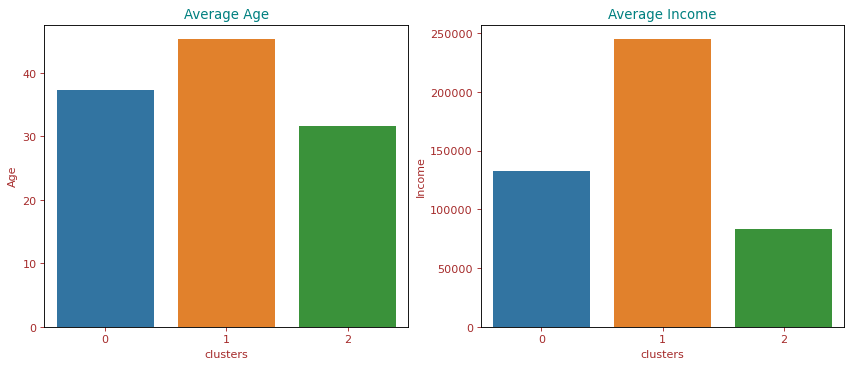

In [167]:
#Draw average age, income chart
df_ac_mean = df_ac.groupby(['clusters']).mean()
df_ac_mean['clusters'] = [0,1,2]

figure(figsize=(5, 5), dpi=80)
plt.subplots_adjust(left=0.1, bottom=None, right=2.1, top=None, wspace=None, hspace=None)

plt.subplot(1, 2, 1)
sns.barplot(data=df_ac_mean, x="clusters", y="Age")
plt.title('Average Age')

plt.subplot(1, 2, 2)
sns.barplot(data=df_ac_mean, x="clusters", y="Income")
plt.title('Average Income')



Text(0.5, 1.0, 'Average Income')

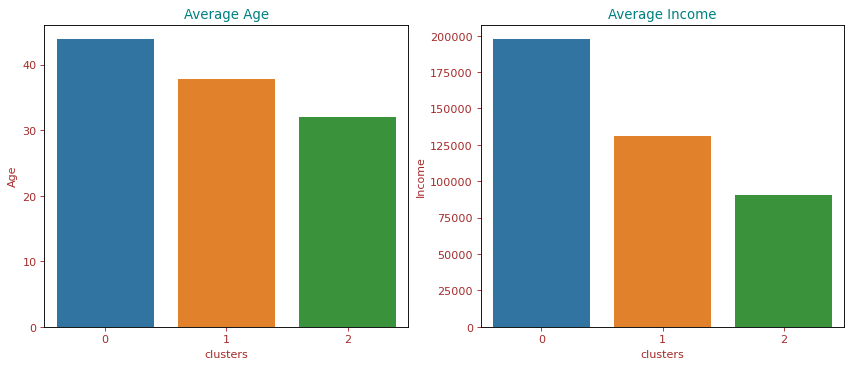

In [156]:
df_km_mean = df_kmean.groupby(['clusters']).mean()
df_km_mean['clusters'] = [0,1,2]

figure(figsize=(5, 5), dpi=80)
plt.subplots_adjust(left=0.1, bottom=None, right=2.1, top=None, wspace=None, hspace=None)

plt.subplot(1, 2, 1)
sns.barplot(data=df_km_mean, x="clusters", y="Age")
plt.title('Average Age')

plt.subplot(1, 2, 2)
sns.barplot(data=df_km_mean, x="clusters", y="Income")
plt.title('Average Income')



# Mode value

In [153]:
df_ac.groupby(['clusters']).agg(pd.Series.mode)

,Sex,Marital status,Age,Education,Occupation,Settlement size
clusters,,,,,,
0,0,0,26,1,1,0
1,0,0,"[42, 45]",2,2,2
2,1,1,"[26, 27]",1,0,0


In [119]:
df_kmean.groupby(['clusters']).agg(pd.Series.mode)

,Sex,Marital status,Age,Education,Occupation,Settlement size
clusters,,,,,,
0,0,0,30,1,2,2
1,0,0,"[35, 36]",1,1,1
2,1,1,26,1,0,0


# Summarize

In [150]:
Sex = { 0 : 'Male', 1 : 'Female'}
Marital_status = { 0 : 'Single', 1 : 'Non-single'}
Education = { 0 : 'Other', 1 : 'High School', 2 : 'University', 3: 'Graduate School'}
Occupation = { 0 : 'Unemployed/Unskilled', 1 : 'Skilled Employee/Official', 2 : 'Management/Self-employed/Highly qualified employee/Officer'}
Settlement_size = { 0 : 'Small City', 1 : 'Mid-sized City', 2 : 'Big City'}

In [168]:
# create table for ac method
ac_clusters = df_ac.groupby(['clusters']).agg(pd.Series.mode).drop('Age',axis = 1)
ac_clusters.replace({'Sex' : Sex},inplace = True)
ac_clusters.replace({'Marital status' : Marital_status},inplace = True)
ac_clusters.replace({'Education' : Education},inplace = True)
ac_clusters.replace({'Occupation' : Occupation},inplace = True)
ac_clusters.replace({'Settlement size' : Settlement_size},inplace = True)
ac_clusters['Age']= ['Middle','High','Low']
ac_clusters['Income']= ['Middle','High','Low']
ac_clusters

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
clusters,,,,,,,
0,Male,Single,High School,Skilled Employee/Official,Small City,Middle,Middle
1,Male,Single,University,Management/Self-employed/Highly qualified empl...,Big City,High,High
2,Female,Non-single,High School,Unemployed/Unskilled,Small City,Low,Low


In [169]:
# create table for k-Mean method
km_clusters = df_kmean.groupby(['clusters']).agg(pd.Series.mode).drop('Age',axis = 1)
km_clusters.replace({'Sex' : Sex},inplace = True)
km_clusters.replace({'Marital status' : Marital_status},inplace = True)
km_clusters.replace({'Education' : Education},inplace = True)
km_clusters.replace({'Occupation' : Occupation},inplace = True)
km_clusters.replace({'Settlement size' : Settlement_size},inplace = True)
km_clusters['Age']= ['High','Middle','Low']
km_clusters['Income']= ['High','Middle','Low']
km_clusters

,Sex,Marital status,Education,Occupation,Settlement size,Age,Income
clusters,,,,,,,
0,Male,Single,High School,Management/Self-employed/Highly qualified empl...,Big City,High,High
1,Male,Single,High School,Skilled Employee/Official,Mid-sized City,Middle,Middle
2,Female,Non-single,High School,Unemployed/Unskilled,Small City,Low,Low
